In [2]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt ### Visualisation tools
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings
from sklearn.naive_bayes import GaussianNB
filterwarnings('ignore')

In [3]:
train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')

In [4]:
#Concatenate the splitted data
df = pd.concat([train,test],ignore_index=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.shape

(1852394, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [8]:
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(exclude = 'object')
le = LabelEncoder()

In [9]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df['gender_le']  = le.fit_transform(df['gender'])


In [11]:
# Seperating  numerical from nominal
# cutting off some data to avoid heavy cpu usage
df2 = df.select_dtypes(exclude = 'object')


In [12]:
df2.shape

(1852394, 11)

In [13]:
df2.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,gender_le
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,1
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,1
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,1


In [14]:
df2 = df2.drop(['cc_num'],axis=1)

In [15]:
df2.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,gender_le
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,1
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,1
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,1


In [16]:
a = df2.drop('is_fraud',axis=1)
b = df2['is_fraud']

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(a,b,train_size = 0.7 , random_state = 10)

In [18]:
df_num.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [19]:
df_num = df_num.drop(['cc_num'],axis=1)

In [20]:
df_num = df_num.drop('is_fraud',axis=1)

In [21]:
df_num.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459


In [22]:
# Scaling the data
ss = StandardScaler()
xtrain[df_num.columns] = ss.fit_transform(xtrain[df_num.columns])
xtest[df_num.columns] = ss.fit_transform(xtest[df_num.columns])

In [23]:
#Building a Logistic Regression Model

lr = LogisticRegression()
model_v1 = lr.fit(xtrain,ytrain)

In [24]:
# Use score method to get accuracy of model
score = lr.score(xtest, ytest)
print(score)

0.9943424644469597


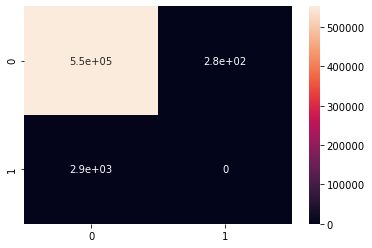

In [25]:
#  predict and confusion matrix

ypred = model_v1.predict(xtest)
cm  = confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [26]:
#classification report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    552856
           1       0.00      0.00      0.00      2863

    accuracy                           0.99    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      0.99      0.99    555719



In [27]:
#KNN model
knn = KNeighborsClassifier()
model_v2 = knn.fit(xtrain,ytrain)
ypred1 = model_v2.predict(xtest)

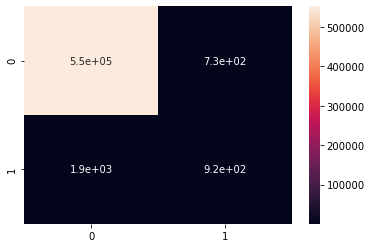

In [28]:
cm_knn = confusion_matrix(ytest,ypred1)
sns.heatmap(cm_knn,annot=True)

In [29]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    552856
           1       0.00      0.00      0.00      2863

    accuracy                           0.99    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      0.99      0.99    555719



In [30]:
# Use score method to get accuracy of model
score = knn.score(xtest, ytest)
print(score)

0.9951936140387498


In [31]:
#Naive Bayes model
nb =GaussianNB()
model_v3 = nb.fit(xtrain,ytrain)

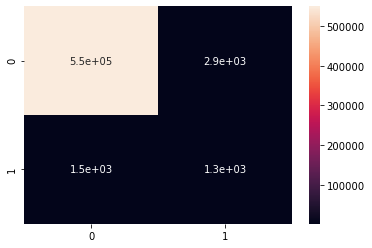

In [32]:
ypred = model_v3.predict(xtest)
cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [33]:
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    552856
           1       0.31      0.46      0.37      2863

    accuracy                           0.99    555719
   macro avg       0.65      0.73      0.68    555719
weighted avg       0.99      0.99      0.99    555719



In [34]:
# Use score method to get accuracy of model
score = nb.score(xtest, ytest)
print(score)

0.9919545669663985


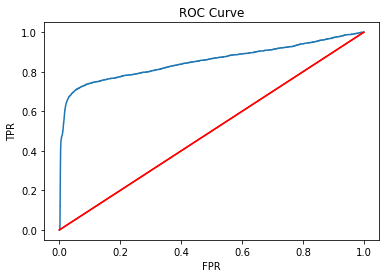

In [35]:
#### ROC curve
## Logistic Regression Model
prob = model_v1.predict_proba(xtest)[:,1]
fpr,tpr,threshold = roc_curve(ytest,prob)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

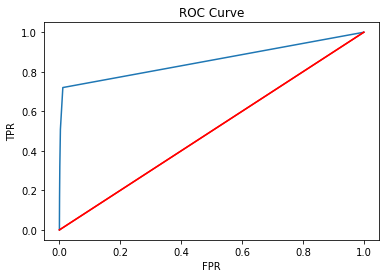

In [36]:
## KNN Classifier Model
prob1 = model_v2.predict_proba(xtest)[:,1]
fpr,tpr,threshold = roc_curve(ytest,prob1)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

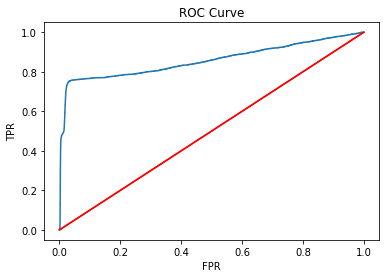

In [37]:
## Naive Bayes Model
prob2 = model_v3.predict_proba(xtest)[:,1]
fpr,tpr,threshold = roc_curve(ytest,prob2)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [38]:
ypred = model_v2.predict(xtest)

In [39]:
prediction = pd.DataFrame()
prediction['Serial No.'] = xtest.index
prediction['is_fraud_pred'] = ypred

In [40]:
prediction[prediction['is_fraud_pred']==1]

,Serial No.,is_fraud_pred
99,45646,1
741,214599,1
812,473947,1
912,378946,1
1741,542042,1
...,...,...
554605,14335,1
554996,1332824,1
555182,33353,1
555613,249685,1


KNN: 0.995218 (0.000176)
LR: 0.994280 (0.000188)
NB: 0.991443 (0.000238)


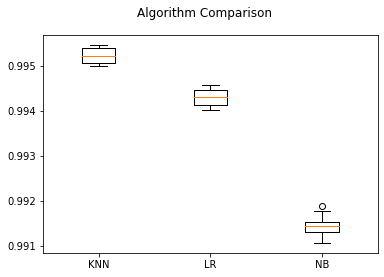

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, xtrain, ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [44]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings( "ignore" )

# to compare our model's accuracy with sklearn model
from sklearn.linear_model import LogisticRegression
# Logistic Regression
class LogitRegression() :
	def __init__( self, learning_rate, iterations ) :		
		self.learning_rate = learning_rate		
		self.iterations = iterations
		
	# Function for model training	
	def fit( self, X, Y ) :		
		# no_of_training_examples, no_of_features		
		self.m, self.n = X.shape		
		# weight initialization		
		self.W = np.zeros( self.n )		
		self.b = 0		
		self.X = X		
		self.Y = Y
		
		# gradient descent learning
				
		for i in range( self.iterations ) :			
			self.update_weights()			
		return self
	
	# Helper function to update weights in gradient descent
	
	def update_weights( self ) :		
		A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
		
		# calculate gradients		
		tmp = ( A - self.Y.T )		
		tmp = np.reshape( tmp, self.m )		
		dW = np.dot( self.X.T, tmp ) / self.m		
		db = np.sum( tmp ) / self.m
		
		# update weights	
		self.W = self.W - self.learning_rate * dW	
		self.b = self.b - self.learning_rate * db
		
		return self
	
	# Hypothetical function h( x )
	
	def predict( self, X ) :	
		Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )		
		Y = np.where( Z > 0.5, 1, 0 )		
		return Y


# Driver code

def main() :
	
	# Importing dataset	
	
	X = a.iloc[:,:-1].values
	Y = b.iloc[:,-1:].values
	
	# Splitting dataset into train and test set
	X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, test_size = 1/3, random_state = 0 )
	
	# Model training	
	model = LogitRegression( learning_rate = 0.01, iterations = 1000 )
	
	model.fit( X_train, Y_train )	
	model1 = LogisticRegression()	
	model1.fit( X_train, Y_train)
	
	# Prediction on test set
	Y_pred = model.predict( X_test )	
	Y_pred1 = model1.predict( X_test )
	
	# measure performance	
	correctly_classified = 0	
	correctly_classified1 = 0
	
	# counter	
	count = 0	
	for count in range( np.size( Y_pred ) ) :
		
		if Y_test[count] == Y_pred[count] :			
			correctly_classified = correctly_classified + 1
		
		if Y_test[count] == Y_pred1[count] :			
			correctly_classified1 = correctly_classified1 + 1
			
		count = count + 1
		
	print( "Accuracy on test set by our model	 : ", (
	correctly_classified / count ) * 100 )
	print( "Accuracy on test set by sklearn model : ", (
	correctly_classified1 / count ) * 100 )


if __name__ == "__main__" :	
	main()

IndexingError: Too many indexers